In [1]:
import numpy as np
import gym
import random
from tqdm import tqdm

In [2]:
%%html
<img src="img/eps-greedy.png">
<img src="img/algo.png">

In [3]:
env_type = "FrozenLake8x8-v0"

In [4]:
env = gym.make(env_type)

alpha = 0.05
max_steps = 250 
episodes = 100000
epsilon_origin = 1.0
epsilon = 1.0
gamma = 0.95
_lambda = 0.5

NUMBER_OF_EVAL_SIMS = 15
history = []
is_decay = True

In [5]:
def Initialize_Q():
    Q = np.zeros((env.env.nS,env.env.nA))
    return Q

def Initialize_E():
    E = np.zeros((env.env.nS,env.env.nA))
    return E

def Initalize_Policy(env):
    Policy = np.array([env.action_space.sample() for _ in range(env.env.nS)])
    return Policy

def tune_params():
    global epsilon
    epsilon = epsilon * 0.999985


def eps_greedy_policy(state,Q):    
    if random.uniform(0,1) <  epsilon:
        new_action = env.action_space.sample() #explore
    else:
        new_action = np.argmax(Q[state,:]) #exploit
        
    return new_action

def policy_eval(policy):
    """
    policy should be an iterable with length of number of states (action per state)
    """
    rewards = []
    for i in range(NUMBER_OF_EVAL_SIMS):
        state = env.reset()

        run_reward = 0
        is_done = False
        while not is_done:
            state, reward, is_done, _ = env.step(policy[state])

            run_reward += reward

        rewards.append(run_reward)

    return np.mean(rewards)

    
def Sarsa_lambda(episodes=episodes,max_steps=max_steps,is_decay=True):
    Q = Initialize_Q()
    total_steps = 0
    rewards = []

    for k in tqdm(range(episodes)):
        
        #init E,S,A
        E = Initialize_E()
        state = env.reset() #random.randint(0,env.env.nS-1) 
        action = eps_greedy_policy(state,Q)
        R = 0

        for step in range(max_steps):
            #Take action A, ovserve R,S'
            new_state, reward, done, _ = env.step(action)
            new_action = eps_greedy_policy(new_state,Q)
            
            delta_error = reward + gamma*Q[new_state,new_action]-Q[state,action]
            E[state,action]+=1
            Q = np.add(Q, np.multiply(alpha * delta_error, E))
            E = np.multiply(gamma * _lambda, E)
            
            state=new_state
            action=new_action
            R+=reward

            total_steps+=1
        
            if  total_steps % 5000 == 0:
                policy = np.argmax(Q,axis=1)
                policy_evaluate = policy_eval(policy)
                history.append([total_steps,policy_evaluate])
            
            if done:
                break
        
        #print("is_decay",is_decay)
        if is_decay:
            tune_params()
            
        rewards.append(R)
        #for debugging
        #reward here including both exploration and explitation (not related to the policy_eval)
        if k % 2000 == 0:
            print("[Episode {0}] Average reward : {1:.3f} epsilon: {2:.3f}".format(k,np.mean(rewards[-1000:]),epsilon))
         
        
        
    return Q,np.argmax(Q,axis=1) # returns Q and the policy


In [6]:
Q,Policy = Sarsa_lambda(episodes,max_steps)

  0%|                                                                             | 67/100000 [00:00<02:29, 666.49it/s]

[Episode 0] Average reward : 0.000 epsilon: 1.000


  2%|█▌                                                                        | 2156/100000 [00:02<01:36, 1011.75it/s]

[Episode 2000] Average reward : 0.002 epsilon: 0.970


  4%|███                                                                        | 4162/100000 [00:04<01:46, 903.85it/s]

[Episode 4000] Average reward : 0.003 epsilon: 0.942


  6%|████▌                                                                     | 6120/100000 [00:06<01:32, 1018.12it/s]

[Episode 6000] Average reward : 0.003 epsilon: 0.914


  8%|██████                                                                    | 8123/100000 [00:08<01:21, 1125.92it/s]

[Episode 8000] Average reward : 0.002 epsilon: 0.887


 10%|███████▍                                                                 | 10224/100000 [00:10<01:20, 1114.87it/s]

[Episode 10000] Average reward : 0.007 epsilon: 0.861


 12%|█████████                                                                 | 12193/100000 [00:12<01:29, 984.65it/s]

[Episode 12000] Average reward : 0.006 epsilon: 0.835


 14%|██████████▎                                                              | 14190/100000 [00:14<01:22, 1045.13it/s]

[Episode 14000] Average reward : 0.007 epsilon: 0.811


 16%|███████████▊                                                             | 16188/100000 [00:16<01:23, 1002.50it/s]

[Episode 16000] Average reward : 0.004 epsilon: 0.787


 18%|█████████████▎                                                           | 18219/100000 [00:18<01:17, 1048.55it/s]

[Episode 18000] Average reward : 0.010 epsilon: 0.763


 20%|██████████████▉                                                           | 20122/100000 [00:20<01:25, 937.81it/s]

[Episode 20000] Average reward : 0.005 epsilon: 0.741


 22%|████████████████▍                                                         | 22183/100000 [00:22<01:24, 924.09it/s]

[Episode 22000] Average reward : 0.008 epsilon: 0.719


 24%|█████████████████▊                                                        | 24128/100000 [00:24<01:18, 969.97it/s]

[Episode 24000] Average reward : 0.009 epsilon: 0.698


 26%|███████████████████▏                                                      | 25984/100000 [00:26<01:15, 980.05it/s]

[Episode 26000] Average reward : 0.014 epsilon: 0.677


 28%|████████████████████▊                                                     | 28103/100000 [00:29<01:18, 913.76it/s]

[Episode 28000] Average reward : 0.011 epsilon: 0.657


 30%|██████████████████████▎                                                   | 30199/100000 [00:31<01:12, 956.39it/s]

[Episode 30000] Average reward : 0.020 epsilon: 0.638


 32%|███████████████████████▊                                                  | 32128/100000 [00:33<01:11, 948.12it/s]

[Episode 32000] Average reward : 0.031 epsilon: 0.619


 34%|█████████████████████████▎                                                | 34165/100000 [00:36<01:19, 824.07it/s]

[Episode 34000] Average reward : 0.026 epsilon: 0.600


 36%|██████████████████████████▋                                               | 36120/100000 [00:38<01:08, 934.63it/s]

[Episode 36000] Average reward : 0.028 epsilon: 0.583


 38%|████████████████████████████▏                                             | 38083/100000 [00:40<01:13, 841.50it/s]

[Episode 38000] Average reward : 0.034 epsilon: 0.566


 40%|█████████████████████████████▋                                            | 40112/100000 [00:43<01:08, 879.70it/s]

[Episode 40000] Average reward : 0.028 epsilon: 0.549


 42%|███████████████████████████████▏                                          | 42092/100000 [00:45<01:03, 910.28it/s]

[Episode 42000] Average reward : 0.030 epsilon: 0.533


 44%|████████████████████████████████▋                                         | 44151/100000 [00:48<01:26, 647.90it/s]

[Episode 44000] Average reward : 0.029 epsilon: 0.517


 46%|██████████████████████████████████▏                                       | 46126/100000 [00:50<01:01, 882.04it/s]

[Episode 46000] Average reward : 0.030 epsilon: 0.502


 48%|███████████████████████████████████▌                                      | 48002/100000 [00:53<01:04, 808.60it/s]

[Episode 48000] Average reward : 0.038 epsilon: 0.487


 50%|█████████████████████████████████████                                     | 50122/100000 [00:55<01:04, 777.78it/s]

[Episode 50000] Average reward : 0.043 epsilon: 0.472


 52%|██████████████████████████████████████▌                                   | 52077/100000 [00:58<01:01, 785.45it/s]

[Episode 52000] Average reward : 0.058 epsilon: 0.458


 54%|████████████████████████████████████████                                  | 54151/100000 [01:01<00:57, 797.56it/s]

[Episode 54000] Average reward : 0.050 epsilon: 0.445


 56%|█████████████████████████████████████████▌                                | 56088/100000 [01:03<00:58, 747.09it/s]

[Episode 56000] Average reward : 0.063 epsilon: 0.432


 58%|███████████████████████████████████████████                               | 58132/100000 [01:06<00:52, 803.04it/s]

[Episode 58000] Average reward : 0.062 epsilon: 0.419


 60%|████████████████████████████████████████████▍                             | 60084/100000 [01:08<00:57, 689.98it/s]

[Episode 60000] Average reward : 0.081 epsilon: 0.407


 62%|█████████████████████████████████████████████▉                            | 62077/100000 [01:11<00:49, 759.65it/s]

[Episode 62000] Average reward : 0.075 epsilon: 0.395


 64%|███████████████████████████████████████████████▍                          | 64056/100000 [01:14<00:44, 810.74it/s]

[Episode 64000] Average reward : 0.074 epsilon: 0.383


 66%|████████████████████████████████████████████████▉                         | 66168/100000 [01:17<00:41, 812.85it/s]

[Episode 66000] Average reward : 0.087 epsilon: 0.372


 68%|██████████████████████████████████████████████████▍                       | 68103/100000 [01:19<01:03, 499.84it/s]

[Episode 68000] Average reward : 0.105 epsilon: 0.361


 70%|███████████████████████████████████████████████████▉                      | 70122/100000 [01:22<00:38, 778.55it/s]

[Episode 70000] Average reward : 0.095 epsilon: 0.350


 72%|█████████████████████████████████████████████████████▎                    | 72042/100000 [01:25<00:38, 728.31it/s]

[Episode 72000] Average reward : 0.109 epsilon: 0.340


 74%|██████████████████████████████████████████████████████▊                   | 74085/100000 [01:28<00:35, 726.12it/s]

[Episode 74000] Average reward : 0.110 epsilon: 0.330


 76%|████████████████████████████████████████████████████████▎                 | 76147/100000 [01:31<00:33, 709.07it/s]

[Episode 76000] Average reward : 0.112 epsilon: 0.320


 78%|█████████████████████████████████████████████████████████▊                | 78059/100000 [01:34<00:30, 725.16it/s]

[Episode 78000] Average reward : 0.106 epsilon: 0.310


 80%|███████████████████████████████████████████████████████████▎              | 80132/100000 [01:37<00:28, 701.38it/s]

[Episode 80000] Average reward : 0.135 epsilon: 0.301


 82%|████████████████████████████████████████████████████████████▊             | 82097/100000 [01:40<00:33, 527.53it/s]

[Episode 82000] Average reward : 0.091 epsilon: 0.292


 84%|██████████████████████████████████████████████████████████████▏           | 84086/100000 [01:43<00:27, 584.19it/s]

[Episode 84000] Average reward : 0.140 epsilon: 0.284


 86%|███████████████████████████████████████████████████████████████▋          | 86092/100000 [01:46<00:29, 465.84it/s]

[Episode 86000] Average reward : 0.156 epsilon: 0.275


 88%|█████████████████████████████████████████████████████████████████▏        | 88081/100000 [01:49<00:16, 706.01it/s]

[Episode 88000] Average reward : 0.177 epsilon: 0.267


 90%|██████████████████████████████████████████████████████████████████▋       | 90067/100000 [01:52<00:14, 676.74it/s]

[Episode 90000] Average reward : 0.190 epsilon: 0.259


 92%|████████████████████████████████████████████████████████████████████▏     | 92133/100000 [01:55<00:11, 676.55it/s]

[Episode 92000] Average reward : 0.187 epsilon: 0.252


 94%|█████████████████████████████████████████████████████████████████████▋    | 94089/100000 [01:58<00:08, 671.41it/s]

[Episode 94000] Average reward : 0.119 epsilon: 0.244


 96%|███████████████████████████████████████████████████████████████████████▏  | 96120/100000 [02:01<00:05, 675.13it/s]

[Episode 96000] Average reward : 0.174 epsilon: 0.237


 98%|████████████████████████████████████████████████████████████████████████▌ | 98121/100000 [02:04<00:02, 730.66it/s]

[Episode 98000] Average reward : 0.171 epsilon: 0.230


100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:06<00:00, 788.33it/s]


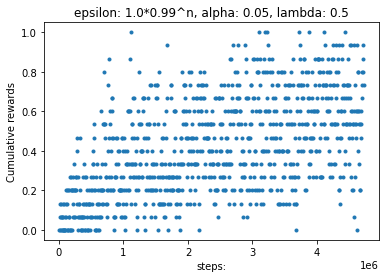

In [7]:
history = np.array(history)

import matplotlib.pyplot as plt
plt.plot(history[:, 0], history[:, 1], '.') 
plt.xlabel('steps:')
plt.ylabel('Cumulative rewards')

str_epsilon = epsilon
if is_decay:
    str_epsilon = str(epsilon_origin)+"*0.99^n"

title = "epsilon: {}, alpha: {}, lambda: {}".format(str_epsilon, alpha, _lambda)
plt.title(title)
plt.savefig("policy_eval_over_steps.png")
plt.show()

In [8]:
def decode_action(action):
    if action == 0:
        return "<"
    if action == 1:
        return "v"
    if action == 2:
        return ">"
    if action == 3:
        return "^"
    else:
        return "Unknown"

env.reset()
env.render()

if env_type == "FrozenLake8x8-v0":
    print(np.array([decode_action(action) for action in Policy]).reshape((8, 8)))
if env_type == "FrozenLake-v0":
    print(np.array([decode_action(action) for action in Policy]).reshape((4, 4)))
        


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[['>' '^' '>' '>' '>' '>' '>' '>']
 ['^' '^' '^' '^' '>' '>' '>' '>']
 ['^' '^' '<' '<' '>' '^' '>' 'v']
 ['^' '^' '^' '^' '<' '<' '>' 'v']
 ['^' '^' '<' '<' '>' 'v' '^' '>']
 ['^' '<' '<' 'v' '^' '<' '<' '>']
 ['<' '<' 'v' '^' '<' '<' '<' '>']
 ['<' 'v' '<' '<' '>' 'v' 'v' '<']]
